In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import glob

In [3]:
BASE_PATH = Path('/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/')
sexcheck_file = BASE_PATH/'tmp/GECOPD_annotated_plink_merged.sexcheck'
het_file = BASE_PATH/'tmp/GECOPD_annotated_plink_merged.het'
fam_file = BASE_PATH/'tmp/GECOPD_annotated_plink_merged.fam'
stashq_file = BASE_PATH/'tmp/wgs.10a.stashq.txt'
idmap_file = '/proj/regeps/regep00/studies/COPDGene/metadata/GECOPD_aliases.txt'

## We'relooking at a weird sex-check plot (females appear bimodal)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.000e+00, 3.300e+01, 2.610e+02, 4.890e+02,
        4.220e+02, 2.170e+02, 6.700e+01, 2.900e+01, 9.000e+00, 8.000e+00,
        6.000e+00, 4.000e+00, 7.000e+00, 1.000e+01, 1.000e+01, 1.600e+01,
        1.260e+02, 5.080e+02, 1.086e+03, 1.150e+03, 4.440e+02, 9.600e+01,
        9.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.676e+03]),
 array([-0.634  , -0.60132, -0.56864, -0.53596, -0.50328, -0.4706 ,
        -0.43792, -0.40524, -0.37256, -0.33988, -0.3072 , -0.27452,
        -0.24184, -0.20916, -0.17648, -0.1438 , -0.11112, -0.07844,
        -0.04576, -0.01308,  0.0196 ,  0.05228,  0.08496,  0.11764,
         0.15032,  0.183  ,  0.21568,  0.24836,  0.28104,  0.31372,
         0.3464 ,  0.37908,  0.41176

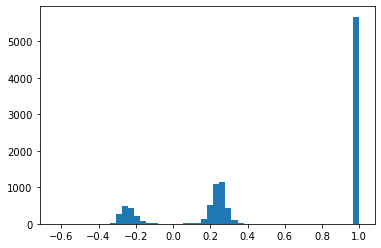

In [6]:
df_sexcheck = pd.read_csv(sexcheck_file, delim_whitespace=True, dtype={'F':float})
plt.hist(df_sexcheck["F"], bins=50)

## Looking instead at the .het file, it's actually *all* subjects that are bimodal

(array([6.800e+01, 7.400e+02, 1.356e+03, 7.080e+02, 2.680e+02, 1.250e+02,
        6.000e+01, 4.000e+01, 3.400e+01, 1.800e+01, 1.100e+01, 1.700e+01,
        6.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 6.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 6.000e+00, 5.000e+00,
        6.000e+00, 7.000e+00, 7.000e+00, 1.800e+01, 1.900e+01, 4.300e+01,
        1.690e+02, 5.050e+02, 1.594e+03, 3.178e+03, 1.460e+03, 1.630e+02,
        1.000e+01, 6.000e+00, 4.000e+00, 4.000e+00, 1.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.1661  , -0.158316, -0.150532, -0.142748, -0.134964, -0.12718 ,
        -0.119396, -0.111612, -0.103828, -0.096044, -0.08826 , -0.080476,
        -0.072692, -0.064908, -0.057124, -0.04934 , -0.041556, -0.033772,
        -0.025988, -0.018204, -0.01042 , -0.002636,  0.005148,  0.012932,
         0.020716,  0.0285  ,  0.036284,  0.044068,  0.051852,  0.059636,
      

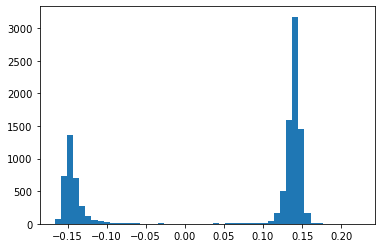

In [7]:
df_het = pd.read_csv(het_file, delim_whitespace=True)
plt.hist(df_het["F"], bins=50)

## In fact, if we look at the Heterozygosity in the other TopMed studies ...

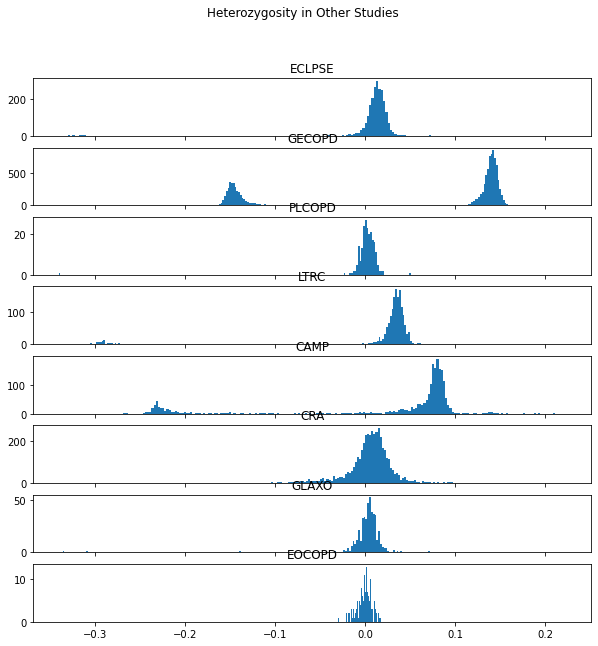

In [65]:

het_files_list = glob.glob(str(BASE_PATH/'tmp/*.het'))

fig, axs = plt.subplots(len(het_files_list), sharex=True, figsize=(10, 10))
fig.suptitle('Heterozygosity in Other Studies')
for (h, het_file) in enumerate(het_files_list):
    s_studyid = het_file.split('/')[-1].split('_')[0]
    df = pd.read_csv(het_file,delim_whitespace=True, dtype={'F':float})
    axs[h].hist(df['F'], bins=200)
    axs[h].set_title(s_studyid)
plt.savefig('GECOPD_heterozygosity.png')

I think it's simply a *feature* of the dataset that we are going to have to live with ...

## Is It MAF? (no)

(array([48906202.,  1501557.,   936814.,   756958.,   649093.,   584729.,
          539085.,   508298.,   493547.,   486645.]),
 array([1.4020000e-04, 5.0126180e-02, 1.0011216e-01, 1.5009814e-01,
        2.0008412e-01, 2.5007010e-01, 3.0005608e-01, 3.5004206e-01,
        4.0002804e-01, 4.5001402e-01, 5.0000000e-01]),
 <BarContainer object of 10 artists>)

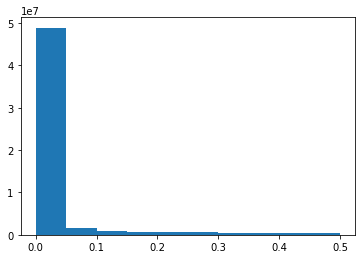

In [60]:
df_frq = pd.read_csv(BASE_PATH/'tmp/GECOPD_annotated_plink_merged.frq', delim_whitespace=True)
plt.hist(df_frq["MAF"])

,sid,ccenter,distwalked,O2_suppl_6MW,Walk_Course,Walk_Limit,WalkSymp_BackPain,WalkSymp_JointPain,WalkSymp_Legs_Fatigue,WalkSymp_ShortnessBreath,...,pre_FEF2575,ATS_ERS,deltaFEV1,deltaFVC,BDR_pct_FEV1,BDR_pct_FVC,BDR,NewGOLD_SGRQ,Visit_Year,RandomGroupCode
0,10002K,BWH,978,0,1,0,Siemens/Sensation-64,Y,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10004O,BWH,1166,1,0,Siemens/Sensation-64,Y,8,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10005Q,NJC,1765,0,1,0,GE/LS,16,Y,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10006S,BWH,1147,2,1,0,Siemens/Sensation-64,Y,3,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10008W,NJC,1305,0,1,0,11,74,1,76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10301,26180S,HAR,300,0,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10302,26181U,UAB,636,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10303,26182W,PIT,1355,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10304,26183Y,TXS,1590,0,2,1,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check heterozygosity by race

In [8]:
### Split the data by race
df_pheno = pd.read_csv('/proj/regeps/regep00/studies/COPDGene/data/pheno/Final10000_Phase1_Rev_28oct16.txt', delim_whitespace=True)
df_fam = pd.read_csv(fam_file, delim_whitespace=True, names=('FID', 'IID', 'DID', 'MID', 'SEX', 'AFF'))
df_stashq = pd.read_csv(stashq_file, delim_whitespace=True, names=('ALIASID', '_index_', 'S_SAMPLEID', 'S_SUBJECTID', 'S_STUDYID'))
df_idmap = pd.read_csv(idmap_file)
df_fam_annotated = df_fam.merge(df_stashq, how='left', left_on='IID', right_on='ALIASID')
df_fam_annotated = df_fam_annotated.merge(df_idmap, how='left', on='S_SUBJECTID')
df_fam_annotated = df_fam_annotated.merge(df_pheno, how='left', left_on='Pheno Id', right_on='sid')
df_fam_annotated

/udd/rejpz/.conda/envs/cdnm-jupyter-python-3.7.6/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (3,4,5,6,53,54,55,58,59,60,62,63,64,131,132,134,136,137,138,139,140,141,142,143,144,145,147,149,153,169,176,178,179,181,188,190,191,192,194,196,198,199,203,204,205,206,209,210,212,213,214,217,218,219,220,223,227,237,241,258,267,278,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,311,312,313,314,315,316) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,FID,IID,DID,MID,SEX,AFF,ALIASID,_index_,S_SAMPLEID,S_SUBJECTID,...,pre_FEF2575,ATS_ERS,deltaFEV1,deltaFVC,BDR_pct_FEV1,BDR_pct_FVC,BDR,NewGOLD_SGRQ,Visit_Year,RandomGroupCode
0,0,NWD100018,0,0,0,-9,NWD100018,1/24,S-001174464,ST-01000557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NWD100059,0,0,0,-9,NWD100059,3/24,S-000554104,ST-00033813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,NWD100095,0,0,0,-9,NWD100095,5/24,S-000964706,ST-00075744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NWD100109,0,0,0,-9,NWD100109,6/24,S-001558939,ST-00078957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NWD100230,0,0,0,-9,NWD100230,8/24,S-001557255,ST-00077474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10692,0,NWD999840,0,0,0,-9,NWD999840,98/103,S-001151679,ST-01003339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10693,0,NWD999849,0,0,0,-9,NWD999849,99/103,S-001116669,ST-00007577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10694,0,NWD999930,0,0,0,-9,NWD999930,100/103,S-001174118,ST-00078863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10695,0,NWD999969,0,0,0,-9,NWD999969,102/103,S-000969098,ST-00078944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_grouped_by_race = df_fam_annotated.groupby('race')['IID'].apply(list).reset_index(name='NWDIDS')
df_grouped_by_race

,race,NWDIDS
0,0.0,"[NWD100018, NWD100059, NWD100095, NWD100109, N..."
1,1.0,"[NWD100652, NWD101627, NWD101874, NWD102695, N..."
2,2.0,"[NWD105227, NWD107734, NWD109015, NWD110714, N..."
3,3.0,"[NWD107913, NWD139395, NWD144541, NWD158236, N..."
4,4.0,"[NWD110622, NWD203982, NWD270411, NWD289300, N..."
5,5.0,"[NWD210017, NWD561210]"


In [ ]:
for (race_code, nwdids_list) in df_grouped_by_race.iterrows():
    with open(BASE_PATH/f'tmp/GECOPD_{race_code}.keep', 'w') as keep_file:
        for nwdid in nwdids_list[1]:
            keep_file.write(f'0\t{nwdid}\n')
    #os.system(f'/udd/rejpz/bin/plink2 --bfile {BASE_PATH}/tmp/GECOPD_annotated_plink_merged --keep {BASE_PATH}/tmp/GECOPD_{race_code}.keep --out {BASE_PATH}/tmp/GECOPD_{race_code} --het')

PLINK v1.90b3.29 64-bit (24 Dec 2015)      https://www.cog-genomics.org/plink2
(C) 2005-2015 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_0.log.
Options in effect:
  --bfile /proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_annotated_plink_merged
  --het
  --keep /proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_0.keep
  --out /proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_0

96519 MB RAM detected; reserving 48259 MB for main workspace.
55362928 variants loaded from .bim file.
10697 people (0 males, 0 females, 10697 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_0.nosex
.
--keep

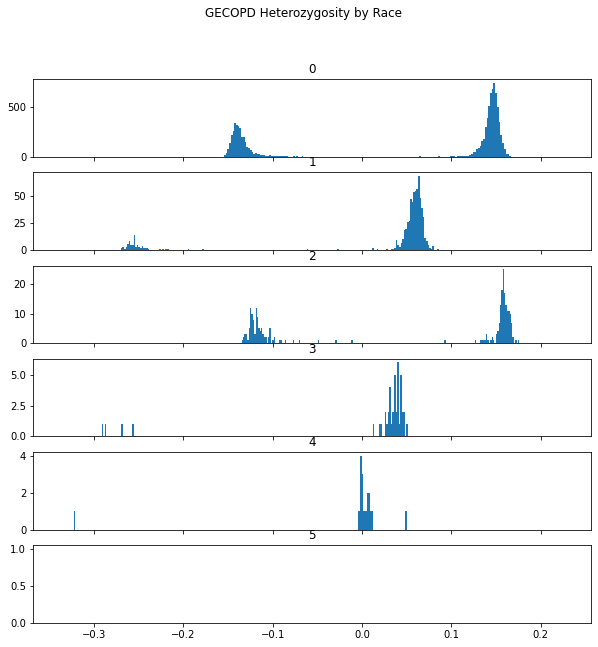

In [11]:
fig, axs = plt.subplots(df_grouped_by_race.shape[0], sharex=True, figsize=(10, 10))
fig.suptitle('GECOPD Heterozygosity by Race')
for (race_code, nwdids_list) in df_grouped_by_race.iterrows():
    df = pd.read_csv(BASE_PATH/f'tmp/GECOPD_{race_code}.het',delim_whitespace=True, dtype={'F':float})
    axs[race_code].hist(df['F'], bins=200)
    axs[race_code].set_title(race_code)
